In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## font
import matplotlib as mpl
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False

## 정규성

import scipy.stats

In [2]:
base='2021 빅콘테스트_데이터분석분야_챔피언리그_수산Biz_데이터_210803/'
train_folder='01_제공데이터/'

data=pd.read_excel(base+train_folder+'2021 빅콘테스트_데이터분석분야_챔피언리그_수산Biz_문제데이터.xlsx')
data.head()

,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE
0,2015-12-28,수산물,아르헨티나,아르헨티나,판매용,갑각류,새우,아르헨티나붉은새우,냉동,7.480000
1,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,냉동,2.920000
2,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,"냉동,절단",3.356352
3,2015-12-28,수산물,칠레,칠레,판매용,패류 멍게류,해삼,해삼,"건조,자숙",18.260870
4,2015-12-28,수산물,중국,중국,판매용,어류,서대 박대 페루다,서대,냉동,4.791340


In [3]:
m={'REG_DATE':'기준일','P_TYPE':'제품구분','CTRY_1':'제조국','CTRY_2':'수출국','P_PURPOSE':'수입용도','CATEGORY_1':'중분류카테고리',
   'CATEGORY_2':'어종','P_NAME':'상세어종','P_IMPORT_TYPE':'수입형태','P_PRICE':'평균단가($)'}

data=data.rename(columns=m)
data.head()

,기준일,제품구분,제조국,수출국,수입용도,중분류카테고리,어종,상세어종,수입형태,평균단가($)
0,2015-12-28,수산물,아르헨티나,아르헨티나,판매용,갑각류,새우,아르헨티나붉은새우,냉동,7.480000
1,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,냉동,2.920000
2,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,"냉동,절단",3.356352
3,2015-12-28,수산물,칠레,칠레,판매용,패류 멍게류,해삼,해삼,"건조,자숙",18.260870
4,2015-12-28,수산물,중국,중국,판매용,어류,서대 박대 페루다,서대,냉동,4.791340


In [4]:
def datainfo(df):
    return pd.DataFrame([(col,df[col].dtype,df[col].nunique(),df[col].isna().sum(),df[col].unique()[:5]) for col in df.columns],
                       columns=['name','dtype','nunique','missing','value :5'])

datainfo(data)

,name,dtype,nunique,missing,value :5
0,기준일,datetime64[ns],210,0,"[2015-12-28T00:00:00.000000000, 2016-01-04T00:..."
1,제품구분,object,1,0,[수산물]
2,제조국,object,87,0,"[아르헨티나, 바레인, 칠레, 중국, 프랑스]"
3,수출국,object,88,0,"[아르헨티나, 바레인, 칠레, 중국, 스페인]"
4,수입용도,object,5,0,"[판매용, 외화획득용 원료, 자사제품제조용, 합작, 반송품(기타)]"
5,중분류카테고리,object,7,0,"[갑각류, 패류 멍게류, 어류, 연체류 해물모듬, 젓갈류 해조류 해파리]"
6,어종,object,113,0,"[새우, 게, 해삼, 서대 박대 페루다, 복어]"
7,상세어종,object,286,0,"[아르헨티나붉은새우, 꽃게, 해삼, 서대, 은밀복]"
8,수입형태,object,78,0,"[냉동, 냉동,절단, 건조,자숙, 냉동,살,자숙, 냉동,살]"
9,평균단가($),float64,39320,0,"[7.48, 2.92, 3.3563522278623803, 18.2608695652..."


In [5]:
data=data[(data['어종'].isin(['오징어','연어','새우']))&(data['상세어종'].isin(['오징어','연어','흰다리새우']))]

In [25]:
## 오징어-페루 는 이상치가 있는것 같다. 나미비아는 1개. 
## 미국,바누아투,베트남,아르헨티나 등 표준편차가 작은 나라
## 제조국에 따라 다른? 나라마다 차이나면 submit은 평균으로 오징어가격을 예측? 어떻게 예측할지 생각.

data[data['어종']=='오징어'].groupby('제조국')['평균단가($)'].agg(['mean','median','max','min','std'])
# data[data['어종']=='연어'].groupby('제조국')['평균단가($)'].agg(['mean','median','max','min'])
# data[data['어종']=='새우'].groupby('제조국')['평균단가($)'].agg(['mean','median','max','min'])

,mean,median,max,min,std
제조국,,,,,
나미비아,1.200000,1.200000,1.200000,1.200000,NaN
뉴질랜드,3.656731,3.696856,6.106920,1.502574,1.073341
대만,3.409022,3.128977,6.289276,0.947761,1.053093
대한민국,2.610826,2.560844,6.197263,1.068750,1.021790
러시아,2.142025,1.924973,4.027513,0.399992,1.102214
미국,2.604393,2.729406,2.784741,2.250000,0.239664
바누아투,2.153459,2.153459,2.328064,1.978855,0.246928
베트남,2.980459,2.980459,3.418465,2.542453,0.619434
아르헨티나,3.586809,3.361235,5.379207,1.052000,0.894286


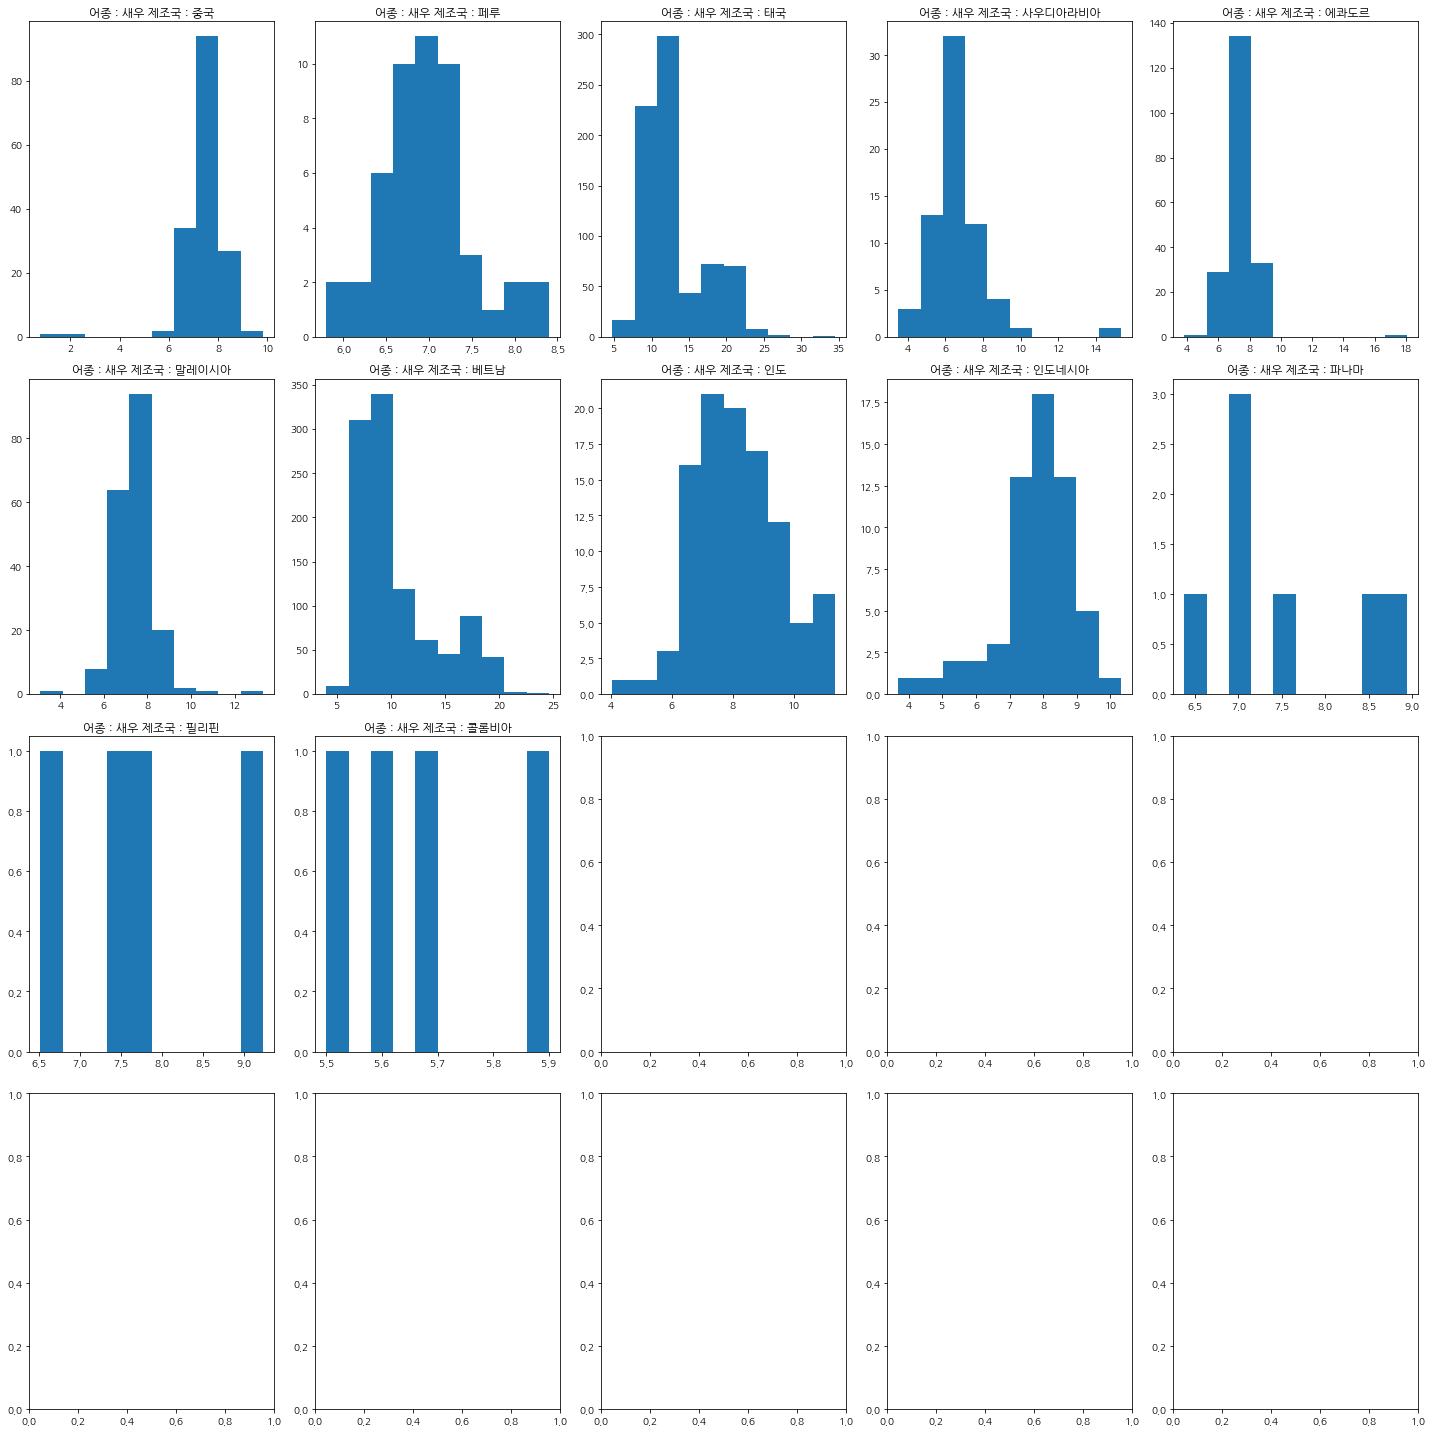

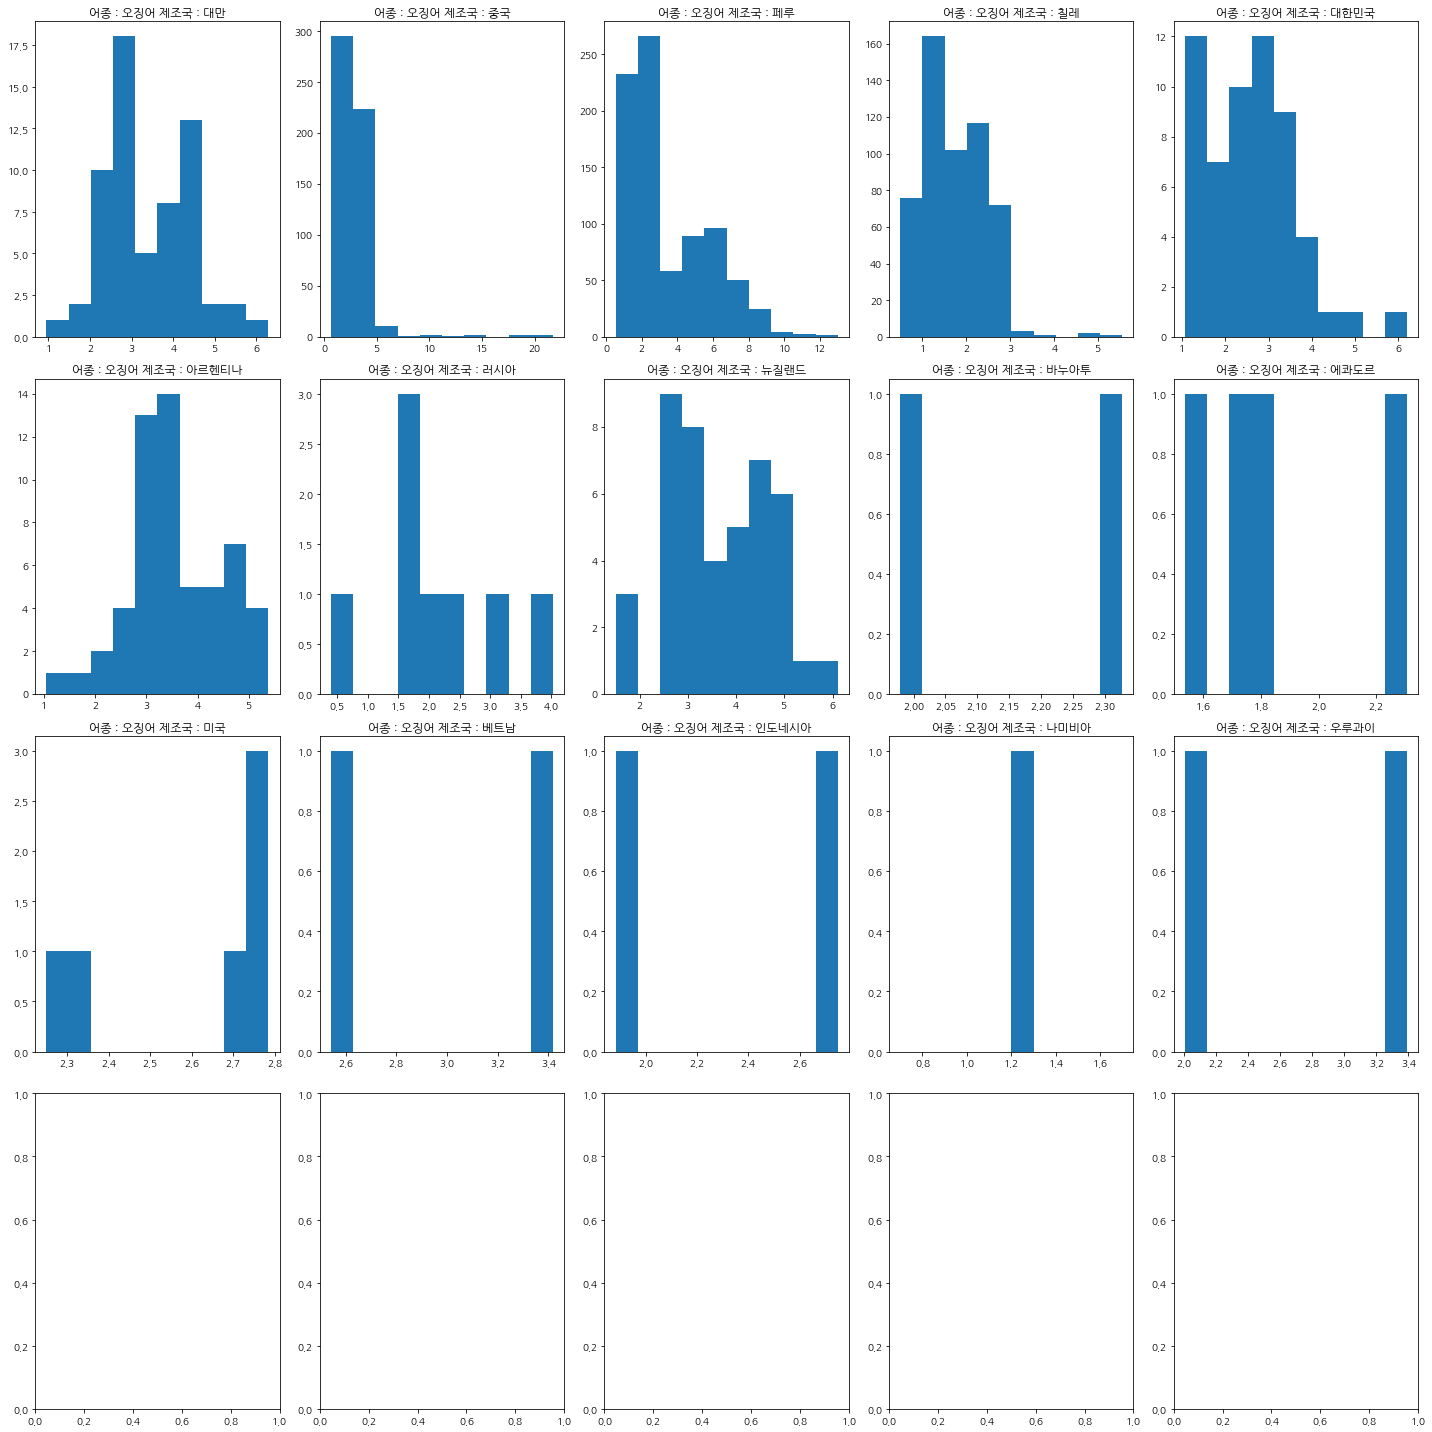

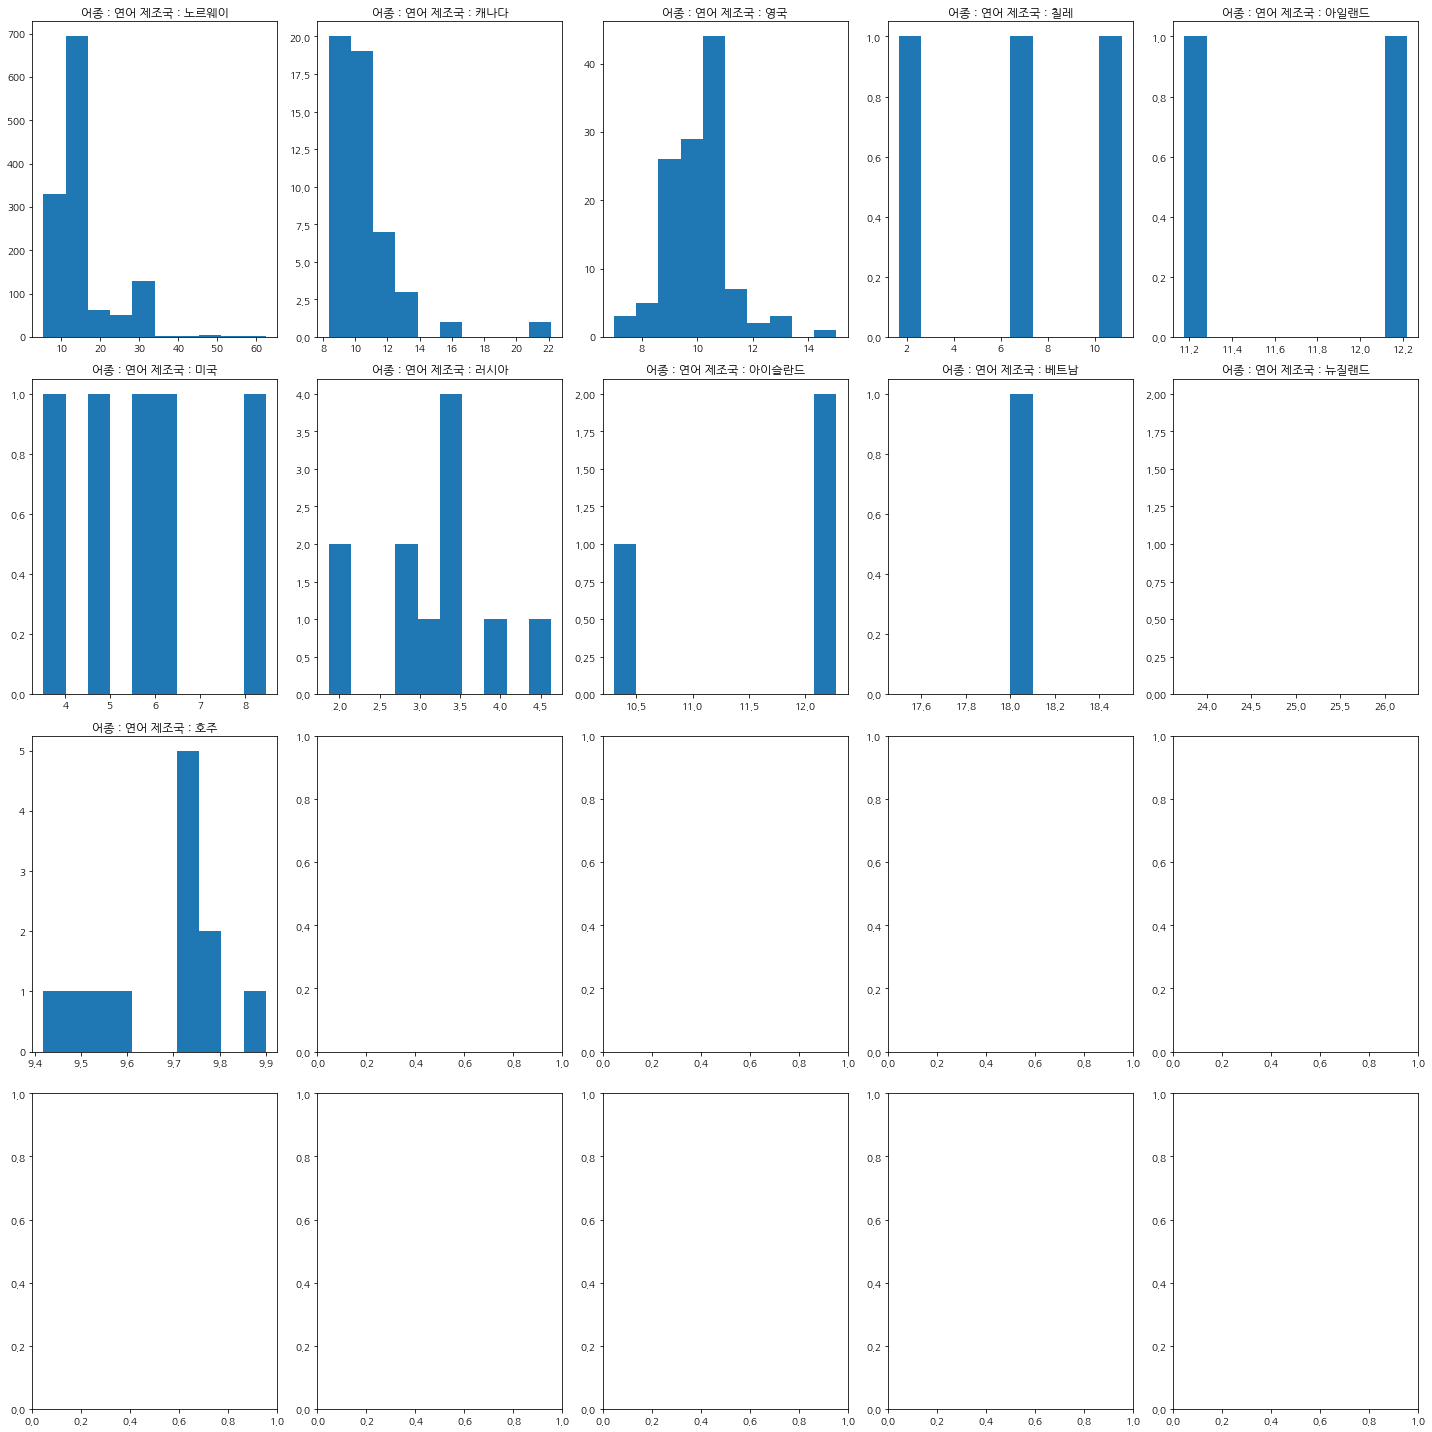

In [27]:
for kind in data['어종'].unique():
    fig,ax=plt.subplots(4,5,figsize=(20,20))

    df1=data[data['어종']==kind]
    
    for idx,country in enumerate(df1['제조국'].unique()):
        df2=df1[df1['제조국']==country]
    
        ax[idx//5,idx%5].hist(df2['평균단가($)'])
        ax[idx//5,idx%5].set_title(f'어종 : {kind} 제조국 : {country}')
        
    plt.tight_layout()
    plt.show()

<!--수출국 별 잡는 시기에 따라 seasonality를 넣어 예측? -->

![노르웨이오징어](https://www.researchgate.net/profile/Vladimir-Laptikhovsky/publication/233610258/figure/fig3/AS:669328055746572@1536591652634/Seasonal-changes-of-length-frequencies-of-the-squid-Todarodes-sagittatus_Q640.jpg)

<AxesSubplot:xlabel='평균단가($)', ylabel='Count'>

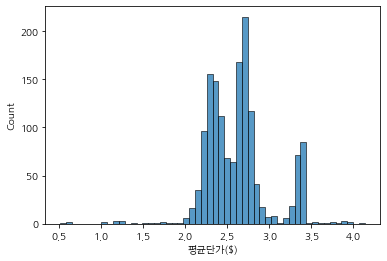

In [50]:
# data=data.set_index('기준일')
sns.histplot(np.log(data[data['어종']=='연어']['평균단가($)']))

## 로그나 별 변화가 없어보인다. 

In [ ]:
# df=data[data['어종']=='오징어']

# c1=df[df['제조국']=='중국']['평균단가($)'].values
# c2=df[df['제조국']=='페루']['평균단가($)'].values
# c3=df[df['제조국']=='태국']['평균단가($)'].values
# c4=df[df['제조국']=='사우디아라비아']['평균단가($)'].values
# c5=df[df['제조국']=='에콰도르']['평균단가($)'].values
# c6=df[df['제조국']=='말레이시아']['평균단가($)'].values
# c7=df[df['제조국']=='베트남']['평균단가($)'].values
# c8=df[df['제조국']=='인도']['평균단가($)'].values
# c9=df[df['제조국']=='인도네시아']['평균단가($)'].values
# c10=df[df['제조국']=='파나마']['평균단가($)'].values
# c11=df[df['제조국']=='필리핀']['평균단가($)'].values
# c12=df[df['제조국']=='콜롬비아']['평균단가($)'].values

# scipy.stats.kruskal(c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12)
# # ,'페루','태국','사우디아라비아','에콰도르','말레이시아','베트남','인도','인도네시아','파나마','필리핀','콜롬비아']
## nan 값.

In [140]:
df=data.loc[(data['어종']=='연어')]

In [75]:
print(df[df['평균단가($)']>=12]['수출국'].value_counts())
df[df['평균단가($)']<6]['수출국'].value_counts()

# df

## 새우는 그렇게 수입용도에 따라 영향이 없다.
## 새우도 나라에 따라 다른것 같다.
## 자숙,포장횟감 이게 비싼 이유같다.

## 연어는 필렛이 중요한것 같다.
## 냉장,필렛(F) - 노르웨이(제조,수출 모두)
## 냉장,필렛(F) 이면서 수입용도에 따라 평균단가는 다르다. 

## 제조국이 노르웨이 일때는 수출국 베트남,노르웨이 밖에 없다. -> 연어는 노르웨이가 제일 많다.

## 연어는 제조국과 수출국이 5개 데이터 빼고 모두 같다. 아예 수입형태 , 에 따라 나눠서 0 1 로 인코딩하고 찾아봐도 괜찮을 것 같다.

## 오징어는 평균단가를 4를 기준으로 나눠봤을 때 자숙이 있어야 비싼것 같다. 나누는게 좋아 보인다.
# df[df['평균단가($)']>=4]['수입형태'].value_counts()
# df[df['평균단가($)']<2]['수입형태'].value_counts()

## 오징어는 평균단가를 기준으로 나라에 따라 싼 오징어만 파는 나라가 있고 한거같다. 묶어서 인코딩 해도 괜찮을 것 같다.
## 오징어는 수입용도를 그렇게 따지지는 않는것 같다.

# df=data.loc[(data['어종']=='연어')&(data['수입형태']=='냉장,필렛(F)')]

# a=df[df['수입용도']!='판매용']['평균단가($)']
# b=df[df['수입용도']=='판매용']['평균단가($)']

# stat, p = scipy.stats.levene(a, b)
# p

0.0030595352230775924

In [76]:
## 결국 평균 다르다. 수입용도에 따라 다르다.
scipy.stats.ttest_ind(a,b,equal_var=False)

Ttest_indResult(statistic=5.268664155640988, pvalue=3.237342403439614e-07)

In [35]:
## 제출 데이터

## 주별로 되어있는걸로 봐서 일주일로 뭉쳐 합가격의 /7로 하는것이 좋을 거 같다. 
## 제조국,수출국에 따라 오징어의 가격이 다르기 때문에

test_folder='02_평가데이터/'

submit=pd.read_excel(base+test_folder+'2021 빅콘테스트_데이터분석분야_챔피언리그_수산Biz_평가데이터.xlsx')
submit.head()

,어종,상세어종,일자,예측단가($),Unnamed: 4,어종.1,상세어종.1,일자.1,예측단가($).1,Unnamed: 9,어종.2,상세어종.2,일자.2,예측단가($).2
0,오징어,오징어,2020-04-06,NaN,NaN,연어,연어,2020-04-06,NaN,NaN,새우,흰다리새우,2020-04-06,NaN
1,NaN,NaN,2020-04-13,NaN,NaN,NaN,NaN,2020-04-13,NaN,NaN,NaN,NaN,2020-04-13,NaN
2,NaN,NaN,2020-04-20,NaN,NaN,NaN,NaN,2020-04-20,NaN,NaN,NaN,NaN,2020-04-20,NaN
3,NaN,NaN,2020-04-27,NaN,NaN,NaN,NaN,2020-04-27,NaN,NaN,NaN,NaN,2020-04-27,NaN
4,NaN,NaN,2020-05-04,NaN,NaN,NaN,NaN,2020-05-04,NaN,NaN,NaN,NaN,2020-05-04,NaN


In [ ]:
# https://dacon.io/competitions/official/235683/codeshare/2341?page=1&dtype=recent 
## 요약 데이터 많이 넣고 회귀